In [7]:
%pip install matplotlib seaborn pandas numpy scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [9]:
# Load sales dataset (replace 'superstore_sales.csv' with your dataset path)
df = pd.read_csv('../sales_dashboard_forecasting/superstore_sales.csv', parse_dates=['Order Date'], encoding='latin1')

# Keep relevant columns
df = df[['Order Date', 'Sales']]

# Create 'Month' column for aggregation
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

monthly_sales.head()


,Month,Sales
0,2014-01-01,14236.895
1,2014-02-01,4519.892
2,2014-03-01,55691.009
3,2014-04-01,28295.345
4,2014-05-01,23648.287


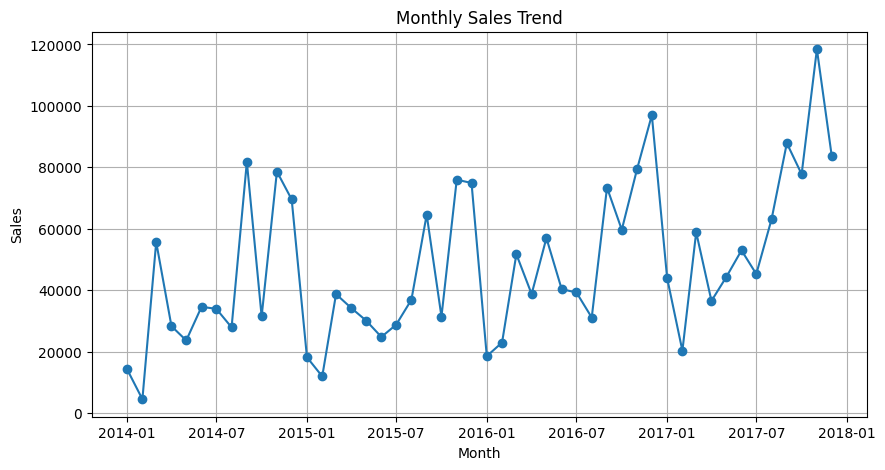

In [10]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [11]:
# Convert month to numeric for regression
monthly_sales['Month_Num'] = np.arange(len(monthly_sales))

X = monthly_sales[['Month_Num']]
y = monthly_sales['Sales']

# Train model on all but last data point
X_train, X_test = X[:-1], X[-1:]
y_train, y_test = y[:-1], y[-1:]

model = LinearRegression()
model.fit(X_train, y_train)

# Predict last known month (test) and next future month
y_pred_last = model.predict(X_test)
next_month = pd.DataFrame({'Month_Num':[X['Month_Num'].max()+1]})
next_month_pred = model.predict(next_month)[0]

print(f"Last Month Actual: {y_test.values[0]:.2f}")
print(f"Last Month Predicted: {y_pred_last[0]:.2f}")
print(f"Next Month Forecast: {next_month_pred:.2f}")


Last Month Actual: 83829.32
Last Month Predicted: 67757.18
Next Month Forecast: 68618.19


In [12]:
# Evaluate model on training data
y_train_pred = model.predict(X_train)
rmse = sqrt(mean_squared_error(y_train, y_train_pred))
r2 = r2_score(y_train, y_train_pred)

print(f"RMSE on Training Data: {rmse:.2f}")
print(f"R² on Training Data: {r2:.4f}")


RMSE on Training Data: 21686.67
R² on Training Data: 0.2248


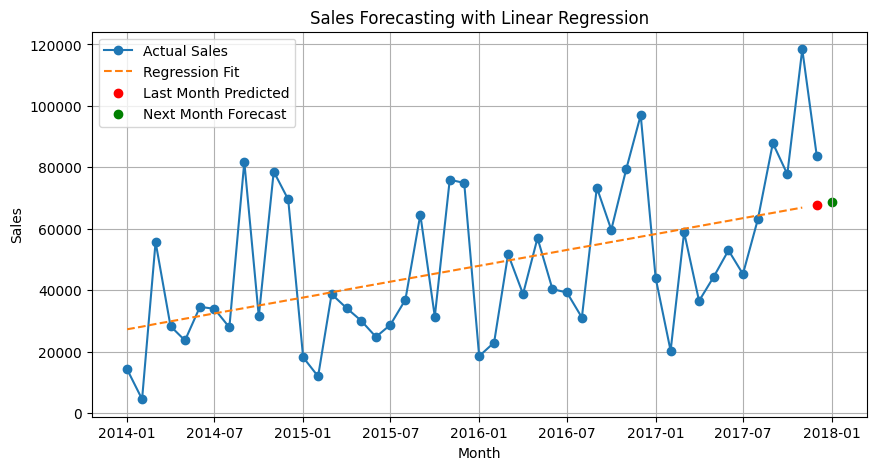

In [13]:
plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'], monthly_sales['Sales'], label='Actual Sales', marker='o')

# Predicted values
plt.plot(monthly_sales['Month'][:-1], y_train_pred, label='Regression Fit', linestyle='--')

# Last known month prediction
plt.scatter(monthly_sales['Month'].iloc[-1], y_pred_last, color='red', label='Last Month Predicted')

# Next month forecast
future_month = monthly_sales['Month'].iloc[-1] + pd.DateOffset(months=1)
plt.scatter(future_month, next_month_pred, color='green', label='Next Month Forecast')

plt.title('Sales Forecasting with Linear Regression')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()
